# Proyek Analisis Data: Bike Sharing Analysis
- Nama: Muhammad Arif Rahman
- Email: arif.rahman1803@gmail.com
- Id Dicoding: arif_rahman8

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana tren rata-rata pengguna sepeda rental dari tahun 2011 hingga 2012, baik pengguna casual maupun langganan (registered)?
- 2. Bagaimana parameter cuaca (musim, kondisi cuaca, suhu) mempengaruhi aktivitas penggunaan sepeda rental berdasarkan keseluruhan?
- 3. Bagaimana waktu (jam dan hari) mempengaruhi aktivitas pengguna sepeda rental berdasarkan pengguna casual dengan langganan (registered)?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
df_daily = pd.read_csv("day.csv")
df_hourly = pd.read_csv("hour.csv")

### Assessing Data

#### Mengecek Missing Value dan Inaccurate Type

In [3]:
df_daily.info()
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

#### Mengecek Duplicates

In [4]:
print("jumlah duplikat df_daily: ", df_daily.duplicated().sum())
print("jumlah duplikat df_hourly: ", df_hourly.duplicated().sum())

jumlah duplikat df_daily:  0
jumlah duplikat df_hourly:  0


#### Mengecek Inaccurate Value

In [5]:
df_daily.describe()
df_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari hasil penilaian data, ditemukan kesalahan tipe data pada kolom tanggal, sehingga perlu diubah dari object menjadi date

In [6]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  df_daily[column] = pd.to_datetime(df_daily[column])


datetime_columns = ["dteday"]
for column in datetime_columns:
  df_hourly[column] = pd.to_datetime(df_hourly[column])
  
  
df_daily.info()
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Selain itu, berdasarkan file readme.txt dari dataset ini, data yang disediakan cukup membingungkan untuk dibaca, misal, tahun 2011 diwakili dengan angka 0 dan 2012 dengan angka 1. maka dari itu, saya akan merubah tipe data tahun (yr) menjadi tipe yang sesuai menggunakan .replace()

In [7]:
df_daily.yr.replace(0, 2011, inplace = True)
df_daily.yr.replace(1, 2012, inplace = True)
df_hourly.yr.replace(0, 2011, inplace = True)
df_hourly.yr.replace(1, 2012, inplace = True)
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Question 2: Weather parameters

Dari data yang tersedia, terdapat 6 parameter cuaca, yaitu: 
musim (season), situasi cuaca (weathersit), temperatur (temp), feels-like temperature (atemp), kelembapan udara (hum), dan kecepatan angin (windspeed). Dari 6 hal tersebut, maka kita dapat melihat korelasi antara pengguna (cnt) dengan parameter cuaca yang disebutkan diatas menggunakan .corr()

In [8]:
df_daily.corr(numeric_only = True)["casual"]
df_daily.corr(numeric_only = True)["registered"]
df_daily.corr(numeric_only = True)["cnt"]

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

season        0.406100  --  Moderate correlation //
weathersit   -0.297391  --  Weak correlation //
temp          0.627494  --  Strong correlation //
atemp         0.631066  --  Strong correlation //
hum          -0.100659  --  Very weak correlation //
windspeed    -0.234545  --  Weak correlation //
ref: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html

didapat bahwa hal yang sangat mempengaruhi penggunaan sepeda rental dengan cuaca adalah suhu dan musim karena memiliki nilai korelasi > 0.4, sedangkan hal lain seperti situasi cuaca, kelembapan, dan kecepatan angin memiliki nilai korelasi yang rendah, yaitu < 0.4. Namun, hal ini perlu ditelusuri lebih lanjut dengan menggunakan visualisasi data sehingga kita mendapatkan informasi yang lebih detail.

Untuk tahap selanjutnya, saya akan menggunakan atemp karena parameter ini sudah mengkonsiderisasikan kelembapan udara serta kecepatan angin, sehingga suhu yang tertera pada atemp merupakan suhu yang dirasakan oleh kulit kita lansung. Maka dari itu, saya membuat grup feeling temperature lalu membuat pivot tablenya

#### Membuat pivot table untuk melihat rata-rata pengguna sepeda rental berdasarkan Feels-like Temperature

In [9]:
df_daily['atemp_group'] = pd.cut(
    x = df_daily['atemp'], 
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
)

atemp_df_daily = df_daily.groupby(by = "atemp_group", as_index = False).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
atemp_df_daily.columns = ["atemp_celcius", "casual", "registered", "total"]

atemp_df_daily.head(10)

,atemp_celcius,casual,registered,total
0,0-5,121.500000,862.000000,983.500000
1,5-10,97.923077,1542.115385,1640.038462
2,10-15,263.609524,2274.123810,2537.733333
3,15-20,540.606061,3103.863636,3644.469697
4,20-25,834.375000,3648.821429,4483.196429
5,25-30,1147.153846,4541.807692,5688.961538
6,30-35,1303.315068,4399.815068,5703.130137
7,35-40,1080.625000,4398.333333,5478.958333
8,40-45,907.250000,2916.750000,3824.000000
9,45-50,NaN,NaN,NaN


#### Membuat pivot table untuk melihat rata-rate pengguna sepeda rental berdasarkan musim

In [10]:
season_df_daily = df_daily.groupby(by = "season", as_index = False).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
season_df_daily.season.replace(1, "Spring", inplace = True)
season_df_daily.season.replace(2, "Summer", inplace = True)
season_df_daily.season.replace(3, "Fall", inplace = True)
season_df_daily.season.replace(4, "Winter", inplace = True)

season_df_daily.head()

,season,casual,registered,cnt
0,Spring,334.928177,2269.204420,2604.132597
1,Summer,1106.097826,3886.233696,4992.331522
2,Fall,1202.611702,4441.691489,5644.303191
3,Winter,729.112360,3999.050562,4728.162921


#### Membuat pivot table untuk melihat rata-rate pengguna sepeda rental berdasarkan kondisi cuaca

In [11]:
weathersit_df_daily = df_daily.groupby(by = "weathersit", as_index = False).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
weathersit_df_daily.weathersit.replace(1, "Clear", inplace = True)
weathersit_df_daily.weathersit.replace(2, "Cloudy", inplace = True)
weathersit_df_daily.weathersit.replace(3, "Light Rain/Snow", inplace = True)
weathersit_df_daily.weathersit.replace(4, "Heavy Rain/Snow", inplace = True)

### Explore Question 1 & 3: User and Time

Dari data yang tersedia, terdapat 6 kategori waktu, yaitu:
tahun (yr), bulan (mnth), jam (hr), liburan (holiday), hari (weekday), dan hari kerja (workingday).
Dari 6 hal tersebut, maka kita dapat melihat pola pengguna sepeda rental berdasarkan waktu dan pengguna. pada analisis waktu dengan pengguna, maka analisisnya akan dilakukan berdasarkan tingkatan waktu, dimulai dari skala terkecil, yaitu per-jam, per-minggu, dan per-bulan. Lalu setelah itu melakukan analisis berdasarkan hari kerja, akhir pekan, dan hari libur.

#### Jumlah Pengguna Casual vs Registered

In [12]:
user = df_daily.agg({
    "casual": "sum",
    "registered": "sum"
})
user.head()

casual         620017
registered    2672662
dtype: int64

#### Rata-rata pengguna sepeda rental tiap jam

In [13]:
user_df_hourly = df_hourly.groupby(by = "hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()
user_df_hourly.head(24)

,hr,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


#### Rata-rata pengguna sepeda rental tiap minggu

In [14]:
weekly_df_daily = df_daily.groupby(by = "weekday").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()
weekly_df_daily.weekday.replace(0, "Sunday", inplace  = True)
weekly_df_daily.weekday.replace(1, "Monday", inplace  = True)
weekly_df_daily.weekday.replace(2, "Tuesday", inplace  = True)
weekly_df_daily.weekday.replace(3, "Wednesday", inplace  = True)
weekly_df_daily.weekday.replace(4, "Thursday", inplace  = True)
weekly_df_daily.weekday.replace(5, "Friday", inplace  = True)
weekly_df_daily.weekday.replace(6, "Saturday", inplace  = True)
weekly_df_daily.head(7)

,weekday,casual,registered,cnt
0,Sunday,1338.295238,2890.533333,4228.828571
1,Monday,674.133333,3663.990476,4338.123810
2,Tuesday,556.182692,3954.480769,4510.663462
3,Wednesday,551.144231,3997.394231,4548.538462
4,Thursday,590.961538,4076.298077,4667.259615
5,Friday,752.288462,3938.000000,4690.288462
6,Saturday,1465.257143,3085.285714,4550.542857


#### Rata-rata pengguna sepeda rental pada hari-hari tertentu (weekday, weekend, hari libur)

In [15]:
holiday_df = df_daily.groupby(by = "holiday").agg({
    "casual": "mean",
    "registered": "mean",
})
holiday_df_T = holiday_df.transpose().reset_index()
holiday_df_T.columns = ["status", "normal", "holiday"]

workingday_df = df_daily.groupby(by = "workingday").agg({
    "casual": "mean",
    "registered": "mean",
})
workingday_df_T = workingday_df.transpose().reset_index()
workingday_df_T.columns = ["status", "weekend", "working_day"]

week_merged_df = pd.merge(
    left = holiday_df_T,
    right = workingday_df_T,
    how = "inner",
    left_on = "status",
    right_on = "status"
)
week_merged_df.head()

,status,normal,holiday,weekend,working_day
0,casual,841.771831,1064.714286,1371.134199,606.57
1,registered,3685.332394,2670.285714,2959.034632,3978.25


#### Jumlah pengguna sepeda rental tiap bulan, dari 2011 hingga 2012

In [16]:
monthly_df_daily = df_daily.groupby(by = ["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

monthly_df_daily.mnth.replace(1, "January", inplace  = True)
monthly_df_daily.mnth.replace(2, "February", inplace = True)
monthly_df_daily.mnth.replace(3, "March", inplace = True)
monthly_df_daily.mnth.replace(4, "April", inplace  = True)
monthly_df_daily.mnth.replace(5, "May", inplace  = True)
monthly_df_daily.mnth.replace(6, "June", inplace  = True)
monthly_df_daily.mnth.replace(7, "July", inplace  = True)
monthly_df_daily.mnth.replace(8, "August", inplace  = True)
monthly_df_daily.mnth.replace(9, "September", inplace  = True)
monthly_df_daily.mnth.replace(10, "October", inplace  = True)
monthly_df_daily.mnth.replace(11, "November", inplace  = True)
monthly_df_daily.mnth.replace(12, "December", inplace  = True)
monthly_df_daily.yr.replace(2011, "11", inplace  = True)
monthly_df_daily.yr.replace(2012, "12", inplace  = True)

monthly_df_daily["period"] = monthly_df_daily[["mnth", "yr"]].astype(str).apply(" '".join, axis = 1)

monthly_df_daily.head(24)

,yr,mnth,casual,registered,cnt,period
0,11,January,3073,35116,38189,January '11
1,11,February,6242,41973,48215,February '11
2,11,March,12826,51219,64045,March '11
3,11,April,22346,72524,94870,April '11
4,11,May,31050,104771,135821,May '11
5,11,June,30612,112900,143512,June '11
6,11,July,36452,104889,141341,July '11
7,11,August,28842,107849,136691,August '11
8,11,September,26545,100873,127418,September '11
9,11,October,25222,98289,123511,October '11


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pengguna sepeda rental dari tahun 2011 hingga 2012, baik pengguna casual maupun langganan (registered)?

#### Melihat visualisasi jumlah pengguna casual vs registered

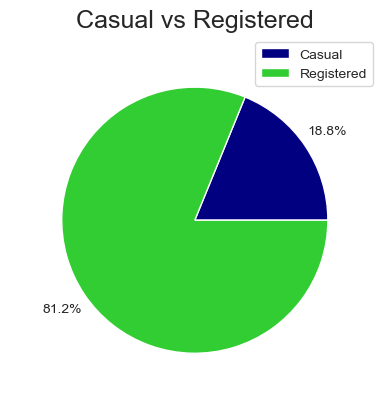

casual         620017
registered    2672662
dtype: int64

In [17]:
label = ["Casual", "Registered"]
color = ["#000080", "#32CD32"]

plt.pie(
    user,
    autopct='%1.1f%%',
    colors = color,
    radius = 0.9,
    pctdistance= 1.2, 
)
plt.legend(labels = label)
plt.title("Casual vs Registered", loc = 'center', fontsize = 18)
plt.show()
user.head()

#### Melihat visualisasi tren jumlah pengguna sepeda rental dari 2011 hingga 2012

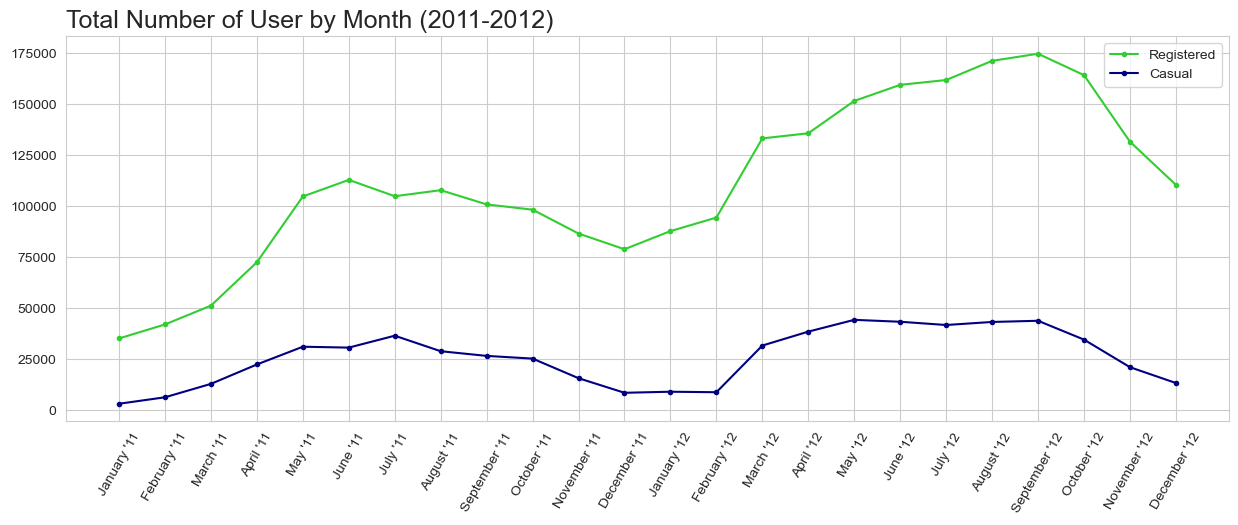

In [18]:
plt.figure(figsize = (15, 5))
plt.plot(
    monthly_df_daily["period"],
    monthly_df_daily["registered"],
    marker = ".",
    label = "Registered",
    color = "limegreen"
)
plt.plot(
    monthly_df_daily["period"],
    monthly_df_daily["casual"],
    marker = ".",
    label = "Casual",
    color = "navy"
)
plt.legend()
plt.xticks(rotation = 60)
plt.title("Total Number of User by Month (2011-2012)", loc = "left", fontsize = 18)
plt.show()

### Pertanyaan 2: Bagaimana parameter cuaca (musim, kondisi cuaca, suhu) mempengaruhi aktivitas penggunaan sepeda rental berdasarkan keseluruhan pengguna?

#### Melihat visualisasi rata-rata pengguna berdasarkan musim

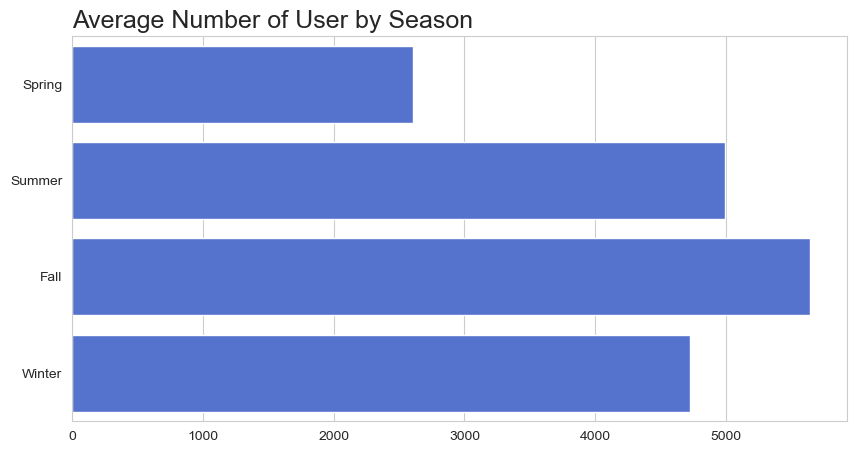

,season,casual,registered,cnt
0,Spring,334.928177,2269.204420,2604.132597
1,Summer,1106.097826,3886.233696,4992.331522
2,Fall,1202.611702,4441.691489,5644.303191
3,Winter,729.112360,3999.050562,4728.162921


In [19]:
plt.figure(figsize = (10, 5))

sns.barplot(
    y = "season",
    x = "cnt",
    data = season_df_daily,
    color = "royalblue"
)
plt.title("Average Number of User by Season", loc = "left", fontsize = 18)
plt.xlabel(None)
plt.ylabel(None)
plt.show()
season_df_daily.head()

#### Melihat visualisasi rata-rata pengguna berdasarkan kondisi cuaca

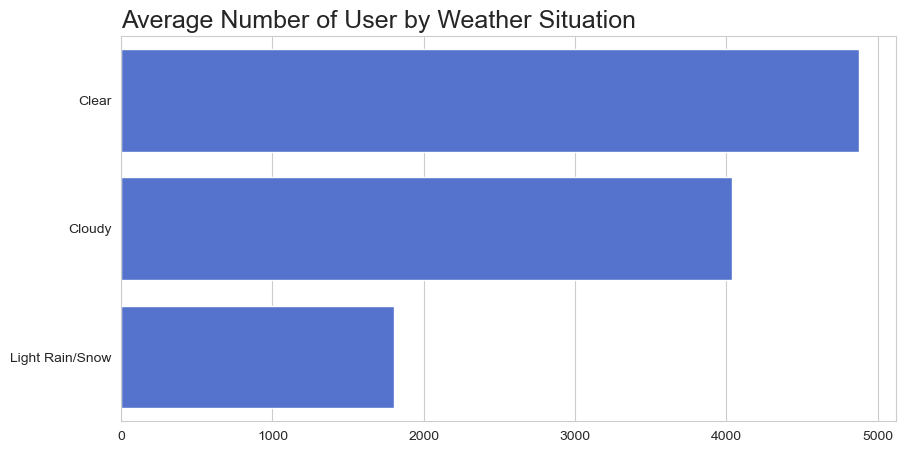

,weathersit,casual,registered,cnt
0,Clear,964.030238,3912.755940,4876.786177
1,Cloudy,687.352227,3348.510121,4035.862348
2,Light Rain/Snow,185.476190,1617.809524,1803.285714


In [20]:
plt.figure(figsize = (10, 5))

sns.barplot(
    y = "weathersit",
    x = "cnt",
    data = weathersit_df_daily.sort_values(by = "cnt", ascending = False),
    color = "royalblue"
)
plt.title("Average Number of User by Weather Situation", loc = "left", fontsize = 18)
plt.xlabel(None)
plt.ylabel(None)
plt.show()
weathersit_df_daily.head()

#### Melihat visualisasi rata-rata pengguna berdasarkan Feels-like Temperature

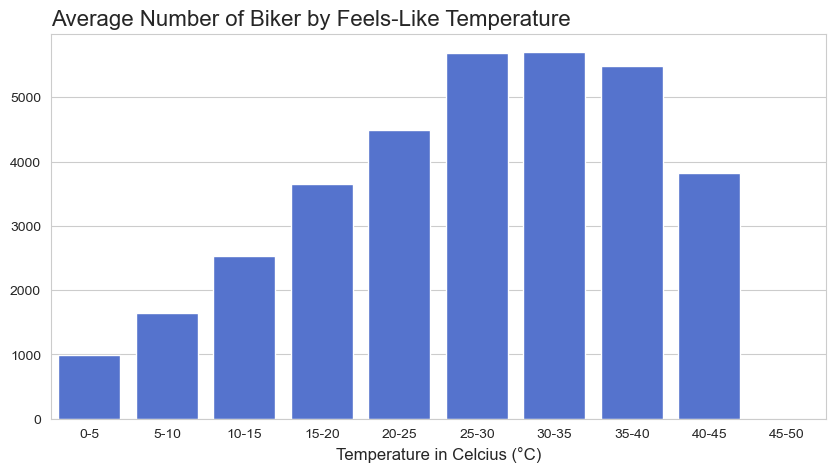

,atemp_celcius,casual,registered,total
0,0-5,121.500000,862.000000,983.500000
1,5-10,97.923077,1542.115385,1640.038462
2,10-15,263.609524,2274.123810,2537.733333
3,15-20,540.606061,3103.863636,3644.469697
4,20-25,834.375000,3648.821429,4483.196429
5,25-30,1147.153846,4541.807692,5688.961538
6,30-35,1303.315068,4399.815068,5703.130137
7,35-40,1080.625000,4398.333333,5478.958333
8,40-45,907.250000,2916.750000,3824.000000
9,45-50,NaN,NaN,NaN


In [21]:
atemp_df_daily = df_daily.groupby(by = "atemp_group", as_index = False).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})
atemp_df_daily.columns = ["atemp_celcius", "casual", "registered", "total"]

plt.figure(figsize = (10, 5))
sns.barplot(
    y = "total",
    x = "atemp_celcius",
    data = atemp_df_daily,
    color = "royalblue"
)
plt.ylabel(None)
plt.xlabel("Temperature in Celcius (°C)", fontsize = 12)
plt.title("Average Number of Biker by Feels-Like Temperature", loc = "left", fontsize = 16)
plt.show()
atemp_df_daily.head(10)

#### Analisis hubungan jumlah pengguna sepeda rental tiap bulan dengan suhu

In [22]:
monthly_atemp_df = df_daily.groupby(by = ['yr', 'mnth']).agg({
    "atemp": "mean",
}).reset_index()
atemp_unorm = monthly_atemp_df["atemp"].apply(lambda x: x * 50)
monthly_atemp_df["atemp"] = atemp_unorm

monthly_atemp_df.mnth.replace(1, "January", inplace  = True)
monthly_atemp_df.mnth.replace(2, "February", inplace = True)
monthly_atemp_df.mnth.replace(3, "March", inplace = True)
monthly_atemp_df.mnth.replace(4, "April", inplace  = True)
monthly_atemp_df.mnth.replace(5, "May", inplace  = True)
monthly_atemp_df.mnth.replace(6, "June", inplace  = True)
monthly_atemp_df.mnth.replace(7, "July", inplace  = True)
monthly_atemp_df.mnth.replace(8, "August", inplace  = True)
monthly_atemp_df.mnth.replace(9, "September", inplace  = True)
monthly_atemp_df.mnth.replace(10, "October", inplace  = True)
monthly_atemp_df.mnth.replace(11, "November", inplace  = True)
monthly_atemp_df.mnth.replace(12, "December", inplace  = True)
monthly_atemp_df.yr.replace(2011, "11", inplace  = True)
monthly_atemp_df.yr.replace(2012, "12", inplace  = True)

monthly_atemp_df["period"] = monthly_atemp_df[["mnth", "yr"]].astype(str).apply(" '".join, axis = 1)

monthly_atemp_df.head(24)

,yr,mnth,atemp,period
0,11,January,10.224479,January '11
1,11,February,14.220620,February '11
2,11,March,16.264958,March '11
3,11,April,22.838745,April '11
4,11,May,27.540681,May '11
5,11,June,32.327972,June '11
6,11,July,35.533008,July '11
7,11,August,32.770758,August '11
8,11,September,28.427252,September '11
9,11,October,22.938811,October '11


#### Melihat visualisasi hubungan jumlah pengguna sepeda rental tiap bulan dengan Feels-like Temperature

C:\Users\M Arif Rahman\AppData\Local\Temp\ipykernel_17956\2738936976.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(monthly_atemp_df["period"], rotation = 60)


Text(0.5, 0.98, 'Relationship between Feels-Like Temperature and Total Number of User by Month')

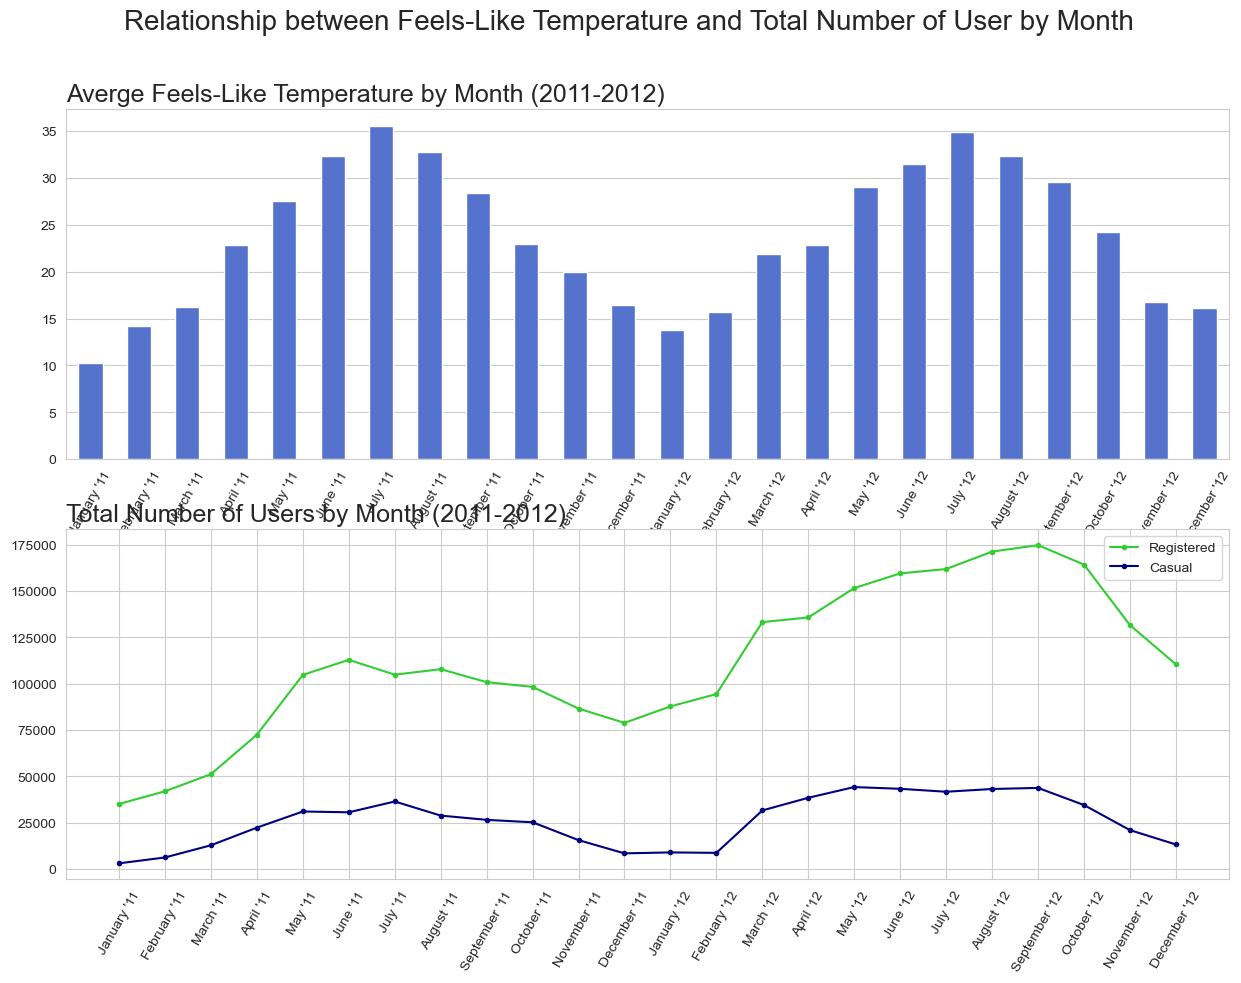

In [23]:
fig , ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
sns.barplot(
    x = "period",
    y = "atemp",
    data = monthly_atemp_df,
    color = "royalblue",
    width = 0.5,
    ax = ax[0]
)
ax[0].set_xticklabels(monthly_atemp_df["period"], rotation = 60)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Averge Feels-Like Temperature by Month (2011-2012)", loc = "left", fontsize = 18)

plt.plot(
    monthly_df_daily["period"],
    monthly_df_daily["registered"],
    marker = ".",
    label = "Registered",
    color = "limegreen",
)
plt.plot(
    monthly_df_daily["period"],
    monthly_df_daily["casual"],
    marker = ".",
    label = "Casual",
    color = "navy",
)
ax[1].set_xticklabels(monthly_atemp_df["period"], rotation = 60)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].legend()
ax[1].set_title("Total Number of Users by Month (2011-2012)", loc = "left", fontsize = 18)

plt.suptitle("Relationship between Feels-Like Temperature and Total Number of User by Month", fontsize = 20)

### Pertanyaan 3: Bagaimana waktu (jam dan hari) mempengaruhi aktivitas pengguna sepeda rental berdasarkan rata-rata pengguna casual dengan langganan (registered)?

#### Melihat visualisasi rata-rata pengguna tiap jam

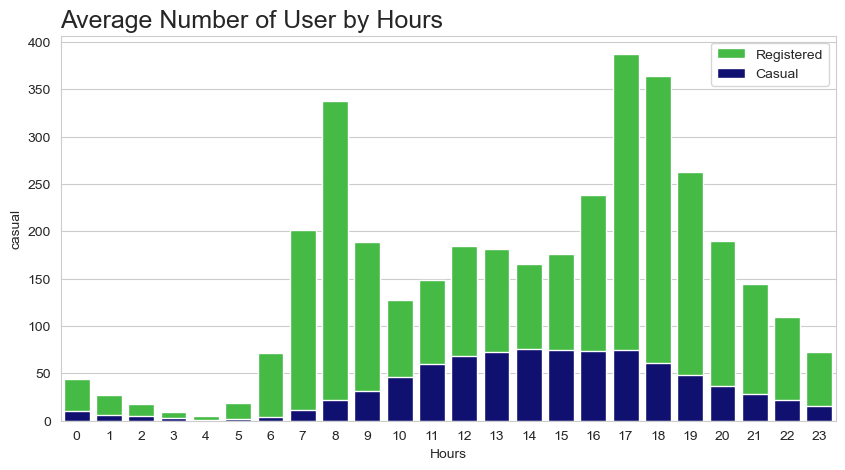

,hr,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


In [24]:
plt.figure(figsize = (10, 5))
sns.barplot(
    x = "hr",
    y = "registered",
    data = user_df_hourly,
    label = "Registered",
    color = "limegreen"
)
sns.barplot(
    x = "hr",
    y = "casual",
    data = user_df_hourly,
    label = "Casual",
    color = "navy"
)
plt.legend()
plt.xticks(range(0,24))
plt.xlabel("Hours")
plt.title("Average Number of User by Hours", loc = "left", fontsize = 18)
plt.show()
user_df_hourly.head(24)

#### Melihat visualisasi rata-rata pengguna tiap minggu

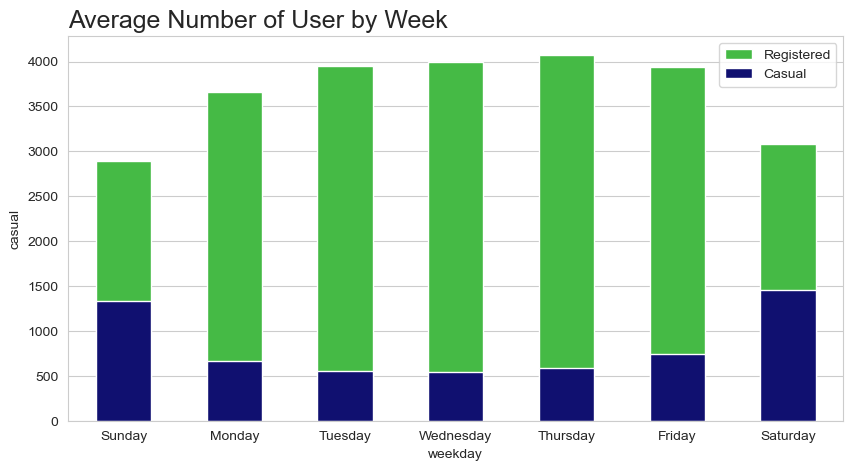

In [25]:
plt.figure(figsize = (10, 5))
sns.barplot(
    x = "weekday",
    y = "registered",
    data = weekly_df_daily,
    label = "Registered",
    color = "limegreen",
    width = 0.5
)
sns.barplot(
    x = "weekday",
    y = "casual",
    data = weekly_df_daily,
    label = "Casual",
    color = "navy",
    width = 0.5
)
plt.legend()
plt.title("Average Number of User by Week", loc = "left", fontsize = 18)
plt.show()

#### Melihat visualisasi rata-rata pengguna pada hari-hari tertentu (weekday, weekend, hari libur)

([<matplotlib.axis.YTick at 0x22e0e452f90>,
 [Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000'),
  Text(0, 3500, '3500'),
  Text(0, 4000, '4000')])

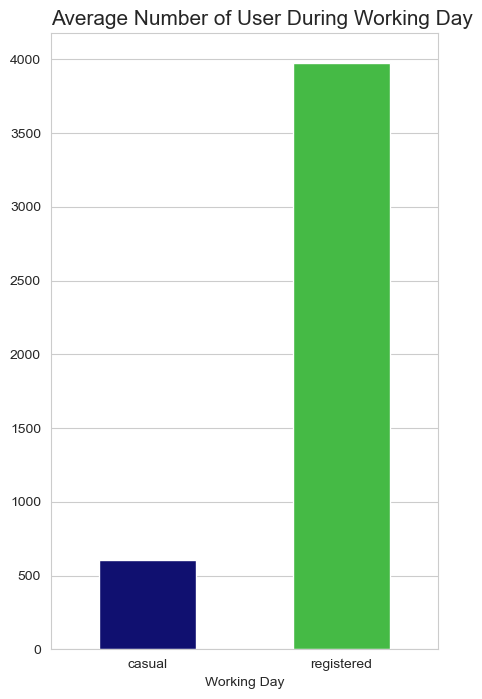

In [26]:
plt.figure(figsize = (5, 8))
color = ["#000080", "#32CD32"]
sns.barplot(
    x = "status",
    y = "working_day",
    data = week_merged_df,
    palette = color,
    width = 0.5
)
plt.xlabel("Working Day")
plt.ylabel(None)
plt.title("Average Number of User During Working Day", loc = "left", fontsize = 15)
plt.yticks(np.arange(0, 4500, 500))

([<matplotlib.axis.YTick at 0x22e0e4fb8d0>,
 [Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000'),
  Text(0, 3500, '3500'),
  Text(0, 4000, '4000')])

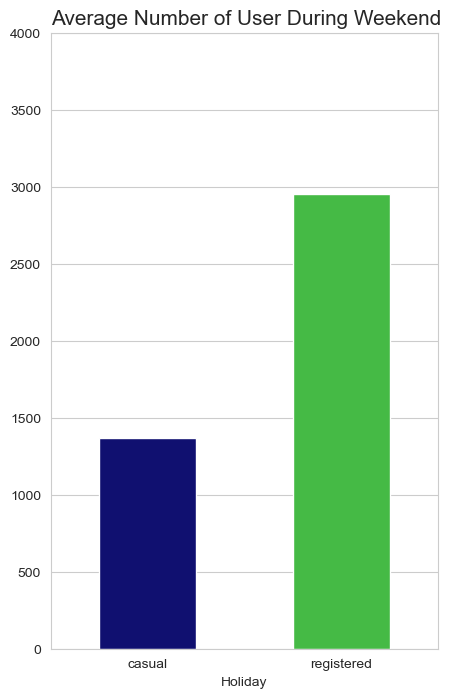

In [27]:
plt.figure(figsize = (5, 8))
sns.barplot(
    x = "status",
    y = "weekend",
    data = week_merged_df,
    palette = color,
    width = 0.5
)
plt.xlabel("Holiday")
plt.ylabel(None)
plt.title("Average Number of User During Weekend", loc = "left", fontsize = 15)
plt.yticks(np.arange(0, 4500, 500))

([<matplotlib.axis.YTick at 0x22e0e47e490>,
 [Text(0, 0, '0'),
  Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000'),
  Text(0, 3500, '3500'),
  Text(0, 4000, '4000')])

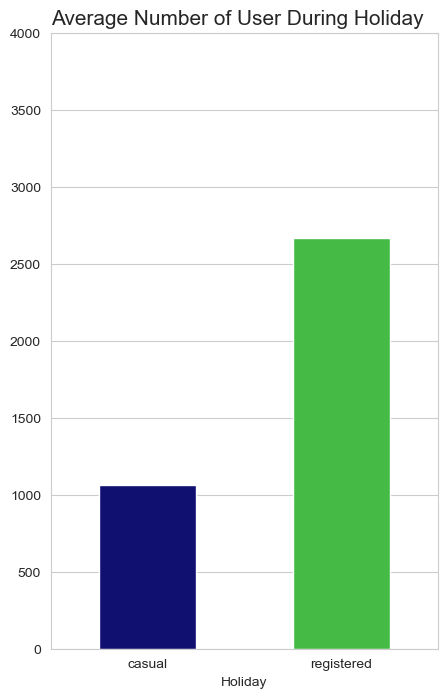

In [28]:
plt.figure(figsize = (5, 8))
sns.barplot(
    x = "status",
    y = "holiday",
    data = week_merged_df,
    palette = color,
    width = 0.5
)
plt.xlabel("Holiday")
plt.ylabel(None)
plt.title("Average Number of User During Holiday", loc = "left", fontsize = 15)
plt.yticks(np.arange(0, 4500, 500))

## Conclusion

- Conclusion pertanyaan 1: Bagaimana tren jumlah pengguna sepeda rental dari tahun 2011 hingga 2012, baik pengguna casual maupun langganan (registered)?

Berdasarkan data dan visualisasi, dapat dilihat bahwa jumlah pengguna sepeda rental yang berlangganan mendominasi sebesar > 80% pada visualisasi pie chart. Lalu, dari line chart berjudul "Total Number of User by Month (2011-2012)" tren jumlah pengguna sepeda rental yang berlangganan cenderung meningkat dari tahun ke tahun, namun ada bulan-bulan tertentu dimana pengguna sepeda rental berlangganan mengalami penurunan, yaitu di bulan November - Januari, yang dimana akan dilakukan analisis pada pertanyaan kedua. Apabila kita melihat tren pengguna sepeda rental casual, tidak terlihat tren peningkatan pengguna yang signifikan, namun polanya mirip dengan pengguna sepeda berlangganan, mengalami penurunan pada bulan tertentu, yaitu November-Januari.

- Conclusion pertanyaan 2: Bagaimana cuaca (musim, kondisi cuaca, suhu) mempengaruhi aktivitas penggunaan sepeda rental berdasarkan keseluruhan pengguna?

Dari data dan visualisasi yang telah dibuat, cuaca cukup mempengaruhi aktivitas penggunaan sepeda rental. Misal, pada visualisasi berjudul "Average Number of User by Weather Situation", rata-rata pengguna masih merental sepeda dalam kondisi cuaca yang cerah atau berawan. Namun, pengguna sepeda turun cukup drastis ketika cuaca sudah mulai hujan atau bersalju ringan. Ketika sudah hujan atau bersalju lebat, tidak ada pengguna sepeda rental sama sekali. Selain itu, suhu juga mempengaruhi penggunaan sepeda rental. Pada visualisasi berjudul "Average Number of Biker by Feels-Like Temperature", Rata-rata pengguna sepeda rental tertinggi jatuh pada suhu sekitar 25 hingga 35 derajat celcius. Lalu, apabila suhu sudah diluar rentang tersebut, terjadi penurunan pengguna sepeda rental. Pertanyaan ini juga akan menjawab alasan mengapa terjadi penurunan pengguna sepeda pada bulan tertentu pada pertanyaan pertama di visualisasi berjudul "Relationship between Feels-Like Temperature and Total Number of User by Month". Apabila dibuat visualisasi antara besaran suhu dengan bulan, dapat terlihat pola yang mirip, pada bulan november hingga januari, terjadi penurunan suhu, sama halnya dengan pengguna sepeda rental. Ini berarti bahwa suhu mempengaruhi penggunaan sepeda rental.

- Conclusion pertanyaan 3: Bagaimana waktu (jam dan hari) mempengaruhi aktivitas pengguna sepeda rental berdasarkan pengguna casual dengan langganan (registered)?

Rata-rata pengguna sepeda rental antara casual dengan berlangganan memiliki pola yang berbeda. Berdasarkan visualisasi berjudul "Average Number of User by Hours", Penggunaan sepeda pada pengguna berlangganan mengalami puncak penggunaan sepeda pada jam 8 dan jam 17-18, hal ini kemungkinan karena jam-jam tersebut merupakan rush hour, dimana orang-orang pulang dan pergi dari tempat kerja. Hal ini juga menunjukkan bahwa mayoritas pengguna sepeda rental langganan merupakan pekerja kantor, namun hal ini perlu dilakukan analisis lebih lanjut dengan data tambahan demografi pengguna sepeda rental. Lalu pengguna sepeda casual tidak mengalami puncak penggunaan sepeda seperti pengguna langganan, hanya saja pengguna sepeda casual cenderung lebih banyak pada jam-jam masih terang, yaitu jam 10 hingga jam 18. Lalu berdasarkan visualisasi berjudul "Average Number of User by Week", dapat dilihat bahwa pengguna sepeda antara casual dengan registered memiliki pola yang berbeda pula, walaupun pengguna sepeda berlangganan selalu lebih banyak daripada pengguna sepeda casual. Pengguna sepeda casual mengalami pola peningkatan penggunaan sepeda pada akhir pekan (weekend), sedangkan pengguna berlangganan mengalami penurunan pada akhir pekan, namun mengalami peningkatan pada hari-hari kerja (Senin-Jumat). Hal ini juga memberikan petunjuk bahwa pengguna sepeda berlangganan merupakan pekerja kantoran, namun sekali lagi perlu analisis lebih lanjut. Hal ini juga didukung pada visualisasi berjudul "Average Number of User During Working Day", bahwa pada hari kerja terjadi kesenjangan jauh antara pengguna sepeda rental casual dengan langganan. Pada visualisasi lain seperti "Average Number of User During Weekend" dan "Average Number of User During Holiday", pengguna sepeda casual mengalami peningkatan, sedangkan pengguna sepeda langganan mengalami penurunan. Dari sini juga didapat bahwa pengguna sepeda casual merupakan pengguna sepeda yang hanya ingin menggunakan sepeda untuk rekreasi pada hari libur maupun akhir pekan, sedangkan pengguna sepeda berlangganan menggunakan sepeda untuk bepergian kerja.